In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### DATASET 1: Heavenly Chocolates

In [2]:
df = pd.read_excel('HeavenlyChocolates - Copy.xlsx')

In [3]:
df.head()

,Customer,Day,Browser,Time (min),Pages Viewed,Amount Spent ($)
0,1,Mon,Chrome,12.0,4,54.52
1,2,Wed,Other,19.5,6,94.90
2,3,Mon,Chrome,8.5,4,26.68
3,4,Tue,Firefox,11.4,2,44.73
4,5,Wed,Chrome,11.3,4,66.27


In [4]:
df.tail()

,Customer,Day,Browser,Time (min),Pages Viewed,Amount Spent ($)
45,46,Fri,Firefox,13.7,4,68.17
46,47,Thu,Chrome,8.1,2,17.84
47,48,Fri,Chrome,9.7,5,103.15
48,49,Mon,Other,7.3,6,52.15
49,50,Fri,Chrome,13.4,3,98.75


In [5]:
df.shape

(50, 6)

In [6]:
print(df.columns)

Index(['Customer', 'Day', 'Browser', 'Time (min)', 'Pages Viewed',
       'Amount Spent ($)'],
      dtype='object')


In [7]:
df.dtypes

Customer              int64
Day                  object
Browser              object
Time (min)          float64
Pages Viewed          int64
Amount Spent ($)    float64
dtype: object

In [8]:
df.describe

<bound method NDFrame.describe of     Customer  Day  Browser  Time (min)  Pages Viewed  Amount Spent ($)
0          1  Mon   Chrome        12.0             4             54.52
1          2  Wed    Other        19.5             6             94.90
2          3  Mon   Chrome         8.5             4             26.68
3          4  Tue  Firefox        11.4             2             44.73
4          5  Wed   Chrome        11.3             4             66.27
5          6  Sat  Firefox        10.5             6             67.80
6          7  Sun   Chrome        11.4             2             36.04
7          8  Fri  Firefox         4.3             6             55.96
8          9  Wed  Firefox        12.7             3             70.94
9         10  Tue   Chrome        24.7             7             68.73
10        11  Sat    Other        13.3             6             54.04
11        12  Sun  Firefox        14.3             5             48.05
12        13  Sun    Other        11.7     

In [9]:
df.Browser.value_counts()

Chrome     27
Firefox    16
Other       7
Name: Browser, dtype: int64

In [10]:
df.groupby(['Browser', 'Pages Viewed'])['Amount Spent ($)'].sum()

Browser  Pages Viewed
Chrome   2               174.68
         3               267.69
         4               299.42
         5               278.82
         6               178.66
         7               457.54
Firefox  2                93.39
         3               125.60
         4               250.63
         5               186.62
         6               123.76
         8               134.40
         10              313.81
Other    4               135.89
         6               201.09
         7                64.16
         9               120.25
Name: Amount Spent ($), dtype: float64

In [11]:
df.pivot_table(index = 'Day', columns = ['Pages Viewed', 'Browser'], values = 'Amount Spent ($)', aggfunc = 'mean')

Pages Viewed     2              3              4                       5   \
Browser      Chrome Firefox Chrome Firefox Chrome Firefox  Other   Chrome   
Day                                                                         
Fri             NaN     NaN  78.32   54.66    NaN  69.275  68.45  103.150   
Mon             NaN     NaN    NaN     NaN  40.60     NaN    NaN      NaN   
Sat             NaN     NaN    NaN     NaN  55.58  27.910    NaN   34.690   
Sun           36.04     NaN  32.73     NaN  37.17     NaN    NaN      NaN   
Thu           29.52     NaN    NaN     NaN  59.20  84.170    NaN      NaN   
Tue           39.06  46.695    NaN     NaN    NaN     NaN  67.44   71.810   
Wed           40.54     NaN    NaN   70.94  66.27     NaN    NaN   34.585   

Pages Viewed              6                       7              8       9   \
Browser      Firefox  Chrome Firefox  Other   Chrome  Other Firefox   Other   
Day                                                                           
Fri              NaN     NaN   55.96    NaN      NaN    NaN   134.4     NaN   
Mon            59.99  104.23     NaN  52.15  118.525    NaN     NaN  120.25   
Sat            78.58     NaN   67.80  54.04   60.140    NaN     NaN     NaN   
Sun            48.05     NaN     NaN    NaN      NaN  64.16     NaN     NaN   
Thu              NaN     NaN     NaN    NaN   91.620    NaN     NaN     NaN   
Tue              NaN   74.43     NaN    NaN   68.730    NaN     NaN     NaN   
Wed              NaN     NaN     NaN  94.90      NaN    NaN     NaN     NaN   

Pages Viewed      10  
Browser      Firefox  
Day                   
Fri           155.30  
Mon           158.51  
Sat              NaN  
Sun              NaN  
Thu              NaN  
Tue              NaN  
Wed              NaN

In [12]:
pd.crosstab(index = df.Day, columns = df.Browser, margins=True)

Browser,Chrome,Firefox,Other,All
Day,,,,
Fri,4,6,1,11
Mon,5,2,2,9
Sat,3,3,1,7
Sun,3,1,1,5
Thu,4,1,0,5
Tue,4,2,1,7
Wed,4,1,1,6
All,27,16,7,50


In [13]:
df=df.drop(columns=['Day', 'Customer'])

In [14]:
df.shape

(50, 4)

In [15]:
df=df.dropna()

In [16]:
df.shape

(50, 4)

In [17]:
df_num=df.select_dtypes(include='number')
df_num.head()

,Time (min),Pages Viewed,Amount Spent ($)
0,12.0,4,54.52
1,19.5,6,94.90
2,8.5,4,26.68
3,11.4,2,44.73
4,11.3,4,66.27


In [18]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
lower_bound

Time (min)          -0.7250
Pages Viewed        -0.8750
Amount Spent ($)   -10.2025
dtype: float64

In [20]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [21]:
df.shape

(46, 4)

<Axes: xlabel='Amount Spent ($)'>

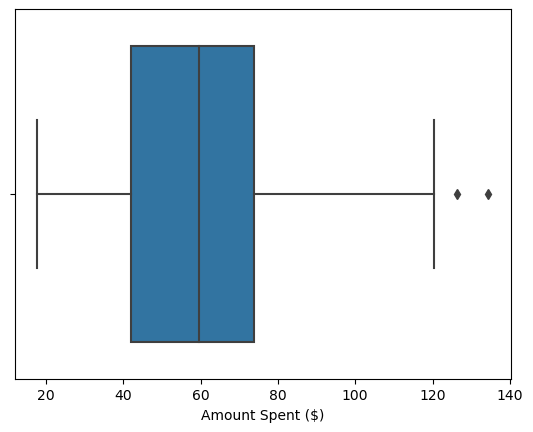

In [22]:
sns.boxplot(x=df['Amount Spent ($)'])

In [23]:
df_num=df.select_dtypes(include='number')
df_num.head()

,Time (min),Pages Viewed,Amount Spent ($)
0,12.0,4,54.52
1,19.5,6,94.90
2,8.5,4,26.68
3,11.4,2,44.73
4,11.3,4,66.27


In [24]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [25]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [26]:
df.shape

(43, 4)

<Axes: xlabel='Amount Spent ($)'>

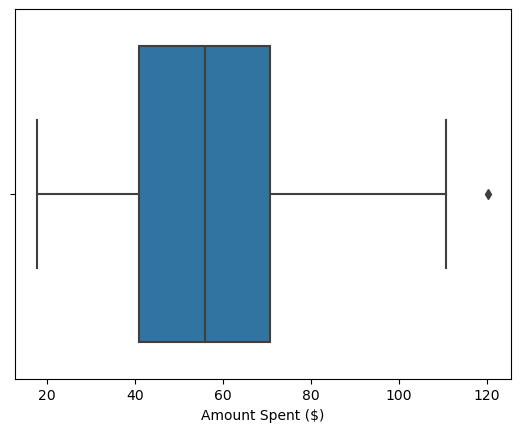

In [27]:
sns.boxplot(x=df['Amount Spent ($)'])

In [28]:
X = df.drop('Amount Spent ($)', axis=1)
y = df['Amount Spent ($)']
X.head()


,Browser,Time (min),Pages Viewed
0,Chrome,12.0,4
1,Other,19.5,6
2,Chrome,8.5,4
3,Firefox,11.4,2
4,Chrome,11.3,4


In [29]:
X_num = X.select_dtypes('number')
X_num.head()

,Time (min),Pages Viewed
0,12.0,4
1,19.5,6
2,8.5,4
3,11.4,2
4,11.3,4


In [30]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Browser
0,Chrome
1,Other
2,Chrome
3,Firefox
4,Chrome


In [31]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [32]:
X_num_scaled = pd.DataFrame((X_num_scaled), columns=X_num.columns, index=X_num.index)
X_num_scaled

,Time (min),Pages Viewed
0,0.506579,0.285714
1,1.000000,0.571429
2,0.276316,0.285714
3,0.467105,0.000000
4,0.460526,0.285714
5,0.407895,0.571429
6,0.467105,0.000000
7,0.000000,0.571429
8,0.552632,0.142857
10,0.592105,0.571429


In [33]:
X_num_scaled.describe()

,Time (min),Pages Viewed
count,43.000000,43.000000
mean,0.440942,0.332226
std,0.236831,0.234782
min,0.000000,0.000000
25%,0.259868,0.142857
50%,0.440789,0.285714
75%,0.592105,0.428571
max,1.000000,1.000000


In [34]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [35]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [36]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((43, 5), (43, 2), (43, 3))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X.to_excel('chocolate_features.xlsx', index=False)
y.to_excel('chocolate_label.xlsx',index=False)

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

In [40]:
k_values = np.arange(1,30,5)
train_mape_scores = []
test_mape_scores = []

In [41]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

In [42]:
test_mape_scores

[0.34081456031925644,
 0.34379871870634154,
 0.42751628752360793,
 0.4840311857109643,
 0.4747205573034053,
 0.49262926989809347]

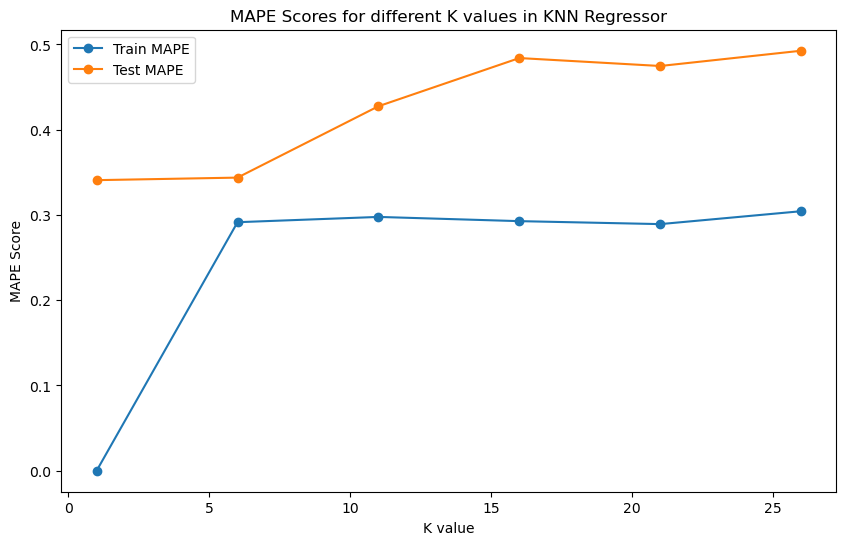

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
k_values = np.arange(1, 30, 5)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

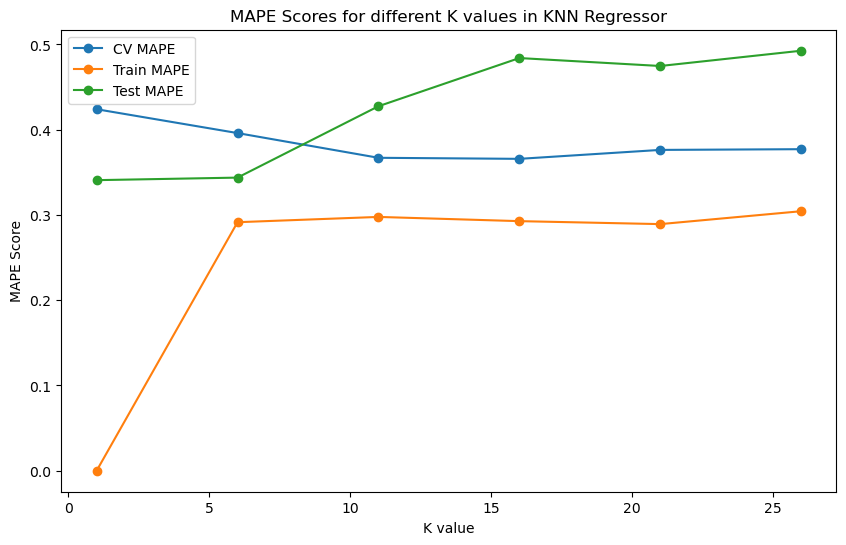

The best K value for CV is 16.


In [46]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [48]:
def k_fold_cross_validation(X, y, k_neighbors=3, k=5):
    scores=[]
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index],X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        scores.append(mse)
    return scores

In [49]:
X = pd.read_excel('chocolate_features.xlsx')
y = pd.read_excel('chocolate_label.xlsx')

In [50]:
cv_scores = k_fold_cross_validation(X, y,k_neighbors=3,k=5)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [51]:
mean_accuracy = np.mean(cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Mean Accuracy: 0.38


### Office Supplies

In [52]:
df=pd.read_excel('Office Supplies (1).xlsx')

In [53]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,2016-07-04,East,Sam,Pen Set,59,4.99
1,2016-07-12,East,Nathan,Binder,29,1.99
2,2016-07-21,Central,Mat,Pen Set,55,12.49
3,2016-07-29,East,Julia,Binder,91,19.99
4,2016-08-07,Central,Mable,Pen Set,42,23.95


In [54]:
df.tail()

,OrderDate,Region,Rep,Item,Units,Unit Price
38,2017-05-22,West,Thomas,Pencil,32,1.99
39,2017-05-31,Central,Bill,Binder,80,8.99
40,2017-06-08,East,Aditi,Binder,60,8.99
41,2017-06-17,Central,Mable,Desk,5,125.00
42,2017-06-25,Central,Mat,Pencil,89,4.99


In [55]:
df.shape

(43, 6)

In [56]:
print(df.columns)

Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price'], dtype='object')


In [57]:
df.dtypes

OrderDate     datetime64[ns]
Region                object
Rep                   object
Item                  object
Units                  int64
Unit Price           float64
dtype: object

In [58]:
df.describe()

,Units,Unit Price
count,43.000000,43.000000
mean,49.511628,20.448140
std,30.262638,47.333897
min,2.000000,1.290000
25%,27.500000,3.990000
50%,53.000000,4.990000
75%,74.500000,18.990000
max,98.000000,275.000000


In [59]:
df.groupby(['Region', 'Item'])['Unit Price'].value_counts()

Region   Item     Unit Price
Central  Binder   8.99          3
                  4.99          2
                  19.99         2
                  17.00         1
         Desk     125.00        2
         Pen      19.99         1
         Pen Set  4.99          2
                  12.49         1
                  23.95         1
         Pencil   1.29          4
                  4.99          3
                  1.99          2
East     Binder   4.99          2
                  1.99          1
                  8.99          1
                  19.99         1
         Pen      4.99          1
                  8.99          1
                  19.99         1
         Pen Set  17.99         2
                  4.99          1
         Pencil   1.99          1
                  4.99          1
West     Binder   19.99         2
         Desk     275.00        1
         Pen      1.99          1
         Pencil   1.99          1
                  2.99          1
Name: Unit Price, d

In [60]:
df.pivot_table(index = 'Item', columns = 'Region', values = 'Unit Price', aggfunc='sum')

Region,Central,East,West
Item,,,
Binder,93.93,40.95,39.98
Desk,250.00,NaN,275.00
Pen,19.99,33.97,1.99
Pen Set,46.42,40.97,NaN
Pencil,24.11,6.98,4.98


In [61]:
pd.crosstab(index = df['Region'], columns= df['Unit Price'], margins = True)

Unit Price,1.29,1.99,2.99,4.99,8.99,12.49,17.0,17.99,19.99,23.95,125.0,275.0,All
Region,,,,,,,,,,,,,
Central,4,2,0,7,3,1,1,0,3,1,2,0,24
East,0,2,0,5,2,0,0,2,2,0,0,0,13
West,0,2,1,0,0,0,0,0,2,0,0,1,6
All,4,6,1,12,5,1,1,2,7,1,2,1,43


In [62]:
df = df.drop(columns=['OrderDate', 'Rep'])

In [63]:
df= df.dropna()

In [64]:
df.shape

(43, 4)

In [65]:
df_num = df.select_dtypes(include='number') 

In [66]:
df_num.head()

,Units,Unit Price
0,59,4.99
1,29,1.99
2,55,12.49
3,91,19.99
4,42,23.95


In [67]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [68]:
lower_bound

Units        -43.00
Unit Price   -18.51
dtype: float64

In [69]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [70]:
df.shape

(40, 4)

<Axes: xlabel='Unit Price'>

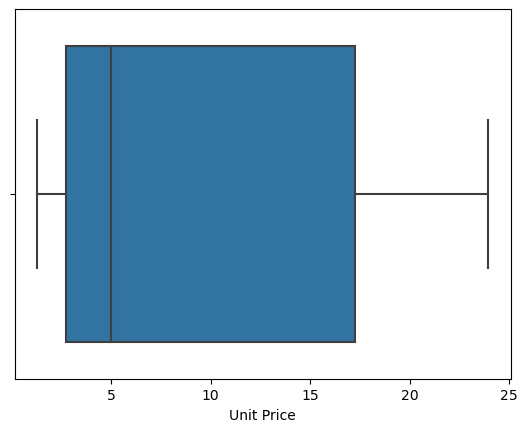

In [71]:
sns.boxplot(x=df['Unit Price'])

In [72]:
X = df.drop('Unit Price', axis=1)
y = df['Unit Price']
X.head()

,Region,Item,Units
0,East,Pen Set,59
1,East,Binder,29
2,Central,Pen Set,55
3,East,Binder,91
4,Central,Pen Set,42


In [73]:
X_num = X.select_dtypes('number')
X_num.head()

,Units
0,59
1,29
2,55
3,91
4,42


In [74]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Region,Item
0,East,Pen Set
1,East,Binder
2,Central,Pen Set
3,East,Binder
4,Central,Pen Set


In [75]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [76]:
X_num_scaled = pd.DataFrame((X_num_scaled), columns=X_num.columns, index=X_num.index)
X_num_scaled

,Units
0,0.585106
1,0.265957
2,0.542553
3,0.925532
4,0.404255
5,0.329787
8,0.031915
9,0.127660
10,0.765957
11,0.255319


In [77]:
X_num_scaled.describe()

,Units
count,40.000000
mean,0.521011
std,0.302738
min,0.000000
25%,0.263298
50%,0.547872
75%,0.757979
max,1.000000


In [78]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [79]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [80]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((40, 8), (40, 1), (40, 7))

In [81]:
X.describe()

,Units,Region_Central,Region_East,Region_West,Item_Binder,Item_Pen,Item_Pen Set,Item_Pencil
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000
mean,0.521011,0.550000,0.325000,0.125000,0.37500,0.125000,0.175000,0.325000
std,0.302738,0.503831,0.474342,0.334932,0.49029,0.334932,0.384808,0.474342
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.263298,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.547872,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.757979,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(32, 8)
(8, 8)
(32,)
(8,)


In [84]:
X.to_excel('OfficeSupplies_features.xlsx', index=False)
y.to_excel('OfficeSupplies_labels.xlsx',index=False)

In [85]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

In [86]:
k_values = np.arange(1,30,3)
train_mape_scores = []
test_mape_scores = []

In [87]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

In [88]:
test_mape_scores

[0.5760148593745309,
 0.5316425598153285,
 0.5096091740891867,
 0.6194642730115495,
 0.6756267744237687,
 0.8235864556563901,
 0.902379915211058,
 1.0264021468924298,
 1.0560982261492788,
 1.0578127104330504]

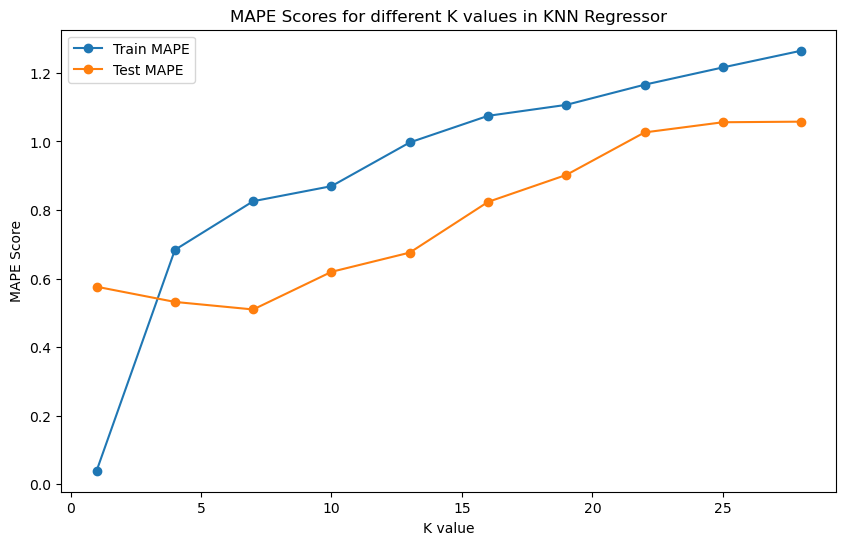

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
k_values = np.arange(1, 30, 5)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []


In [92]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)


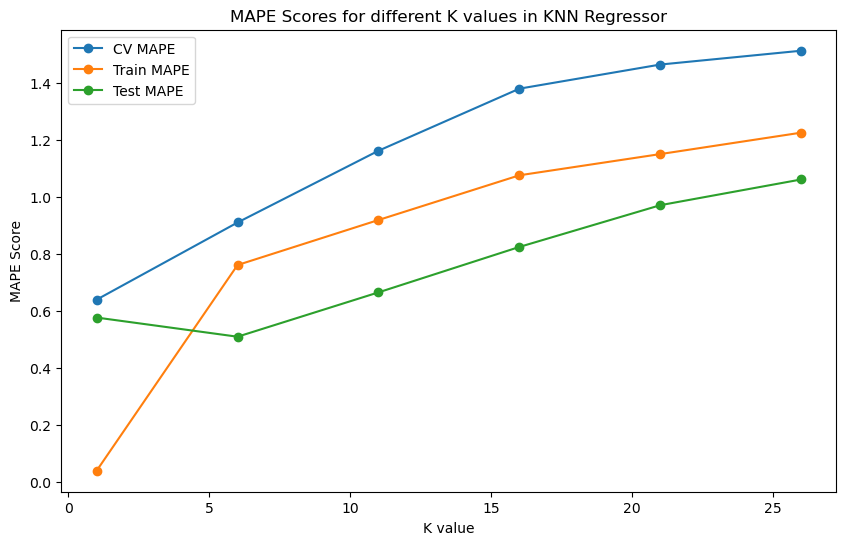

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()


In [94]:
# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")


The best K value for CV is 1.


In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold


In [96]:
def k_fold_cross_validation(X, y, k_neighbors=3, k=5):
    scores=[]
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index],X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        scores.append(mse)
    return scores

In [97]:
X = pd.read_excel('OfficeSupplies_features.xlsx')
y = pd.read_excel('OfficeSupplies_labels.xlsx')

In [98]:
cv_scores = k_fold_cross_validation(X, y,k_neighbors=3,k=5)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [99]:
mean_accuracy = np.mean(cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Mean Accuracy: 1.51


### DATASET 3: Orders

In [100]:
df=pd.read_excel('Sales_Product_Details.xlsx')

In [101]:
df.head()

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
0,20210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Sports,Tops,Fabrics,York,53.958332,-1.080278
1,20210602,92,261,4,32.272403,129.089613,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
2,20210603,92,264,1,36.193364,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
3,20210604,99,251,3,29.913403,89.740210,Jeans,Menswear,Trousers,Cotton,Winchester,51.063202,-1.308000
4,20210605,66,251,1,41.843430,41.843430,Shorts,Womenswear,Trousers,Cotton,Winchester,51.063202,-1.308000


In [102]:
df.tail()

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
25,20210626,32,278,2,47.433316,94.866633,Pyjamas,Menswear,Tops,Cotton,Truro,50.259998,-5.051000
26,20210627,15,288,1,50.002619,50.002619,Pants,Menswear,Trousers,Leather,Worcester,52.192001,-2.220000
27,20210628,56,262,1,33.470936,33.470936,Formal Shirts,Menswear,Tops,Wool,York,53.958332,-1.080278
28,20210629,13,286,1,32.745507,32.745507,Knitwear,Womenswear,Tops,Cashmere,Wells,51.209000,-2.647000
29,20210630,91,291,1,31.879107,31.879107,Knitwear,Menswear,Tops,Cashmere,Wells,51.209000,-2.647000


In [103]:
df.shape

(30, 13)

In [104]:
print(df.columns)

Index(['Date', 'Customer_ID', 'Product_ID', 'Quantity', 'Unit_Price',
       'Sales_Revenue', 'Product_Description', 'Product_Category',
       'Product_Line', 'Raw_Material', 'Region', 'Latitude', 'Longitude'],
      dtype='object')


In [105]:
df.dtypes

Date                     int64
Customer_ID              int64
Product_ID               int64
Quantity                 int64
Unit_Price             float64
Sales_Revenue          float64
Product_Description     object
Product_Category        object
Product_Line            object
Raw_Material            object
Region                  object
Latitude               float64
Longitude              float64
dtype: object

In [106]:
df.describe()

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Latitude,Longitude
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.021062e+07,57.400000,279.733333,2.066667,40.498759,79.687953,52.237571,-2.270437
std,8.803408e+00,31.457251,24.259990,1.142693,16.742578,43.008559,1.449567,1.367443
min,2.021060e+07,9.000000,251.000000,1.000000,21.965812,21.965812,50.259998,-5.051000
25%,2.021061e+07,32.500000,262.250000,1.000000,32.390679,36.774078,51.063202,-2.647000
50%,2.021062e+07,51.000000,276.000000,2.000000,36.191911,79.261696,52.192001,-1.490000
75%,2.021062e+07,90.750000,287.500000,3.000000,44.341442,113.761987,53.680000,-1.353500
max,2.021063e+07,99.000000,357.000000,4.000000,117.306016,175.486148,53.958332,-1.080278


In [107]:
df.groupby(['Quantity'])['Product_Category'].value_counts()

Quantity  Product_Category
1         Menswear            7
          Womenswear          5
          Sports              2
2         Womenswear          2
          Accessories         1
          Menswear            1
3         Womenswear          5
          Menswear            2
          Accessories         1
4         Menswear            3
          Womenswear          1
Name: Product_Category, dtype: int64

In [108]:
df.pivot_table(index = 'Region', columns = ['Product_Category','Quantity'], values='Sales_Revenue', aggfunc = 'sum')

Product_Category Accessories               Menswear                        \
Quantity                   2           3          1          2          3   
Region                                                                      
Truro                    NaN         NaN        NaN  94.866633        NaN   
Wakefield          70.832032         NaN  29.084205        NaN  85.622698   
Wells                    NaN  149.662573  66.671559        NaN        NaN   
Winchester               NaN         NaN        NaN        NaN  89.740210   
Worcester                NaN         NaN  86.195983        NaN        NaN   
York                     NaN         NaN  68.213849        NaN        NaN   

Product_Category                  Sports Womenswear                          \
Quantity                   4           1          1           2           3   
Region                                                                        
Truro                    NaN   21.965812        NaN  179.029594  108.571375   
Wakefield         283.681972         NaN  90.484462         NaN  133.494232   
Wells                    NaN         NaN  32.745507         NaN   81.085713   
Winchester               NaN         NaN  96.837735         NaN  115.492191   
Worcester         129.089613         NaN        NaN         NaN         NaN   
York                     NaN  117.306016        NaN         NaN  124.237513   

Product_Category              
Quantity                   4  
Region                        
Truro                    NaN  
Wakefield         135.727099  
Wells                    NaN  
Winchester               NaN  
Worcester                NaN  
York                     NaN

In [109]:
pd.crosstab(index = df['Region'], columns = df['Product_Category'])

Product_Category,Accessories,Menswear,Sports,Womenswear
Region,,,,
Truro,0,1,1,3
Wakefield,1,4,0,4
Wells,1,2,0,2
Winchester,0,1,0,3
Worcester,0,3,0,0
York,0,2,1,1


In [110]:
df = df.drop(columns=['Customer_ID', 'Date', 'Longitude', 'Latitude'])

In [111]:
df = df.dropna()

In [112]:
df.shape

(30, 9)

In [113]:
df_num = df.select_dtypes(include = 'number')

In [114]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [115]:
lower_bound

Product_ID       224.375000
Quantity          -2.000000
Unit_Price        14.464534
Sales_Revenue    -78.707786
dtype: float64

In [116]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [117]:
df.shape

(27, 9)

<Axes: xlabel='Sales_Revenue'>

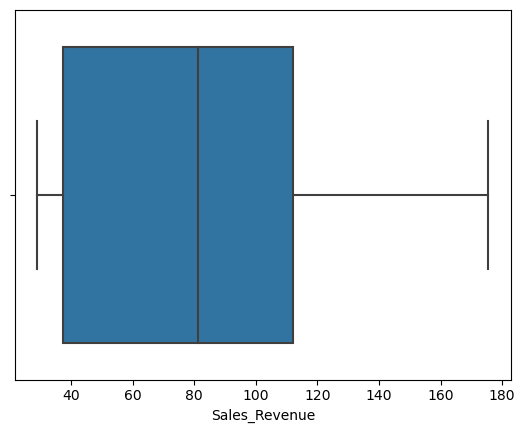

In [118]:
sns.boxplot(x=df['Sales_Revenue'])

In [119]:
X = df.drop('Sales_Revenue', axis=1)
y = df['Sales_Revenue']
X.head()

,Product_ID,Quantity,Unit_Price,Product_Description,Product_Category,Product_Line,Raw_Material,Region
1,261,4,32.272403,Casual Shirts,Menswear,Tops,Cotton,Worcester
2,264,1,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester
3,251,3,29.913403,Jeans,Menswear,Trousers,Cotton,Winchester
4,251,1,41.843430,Shorts,Womenswear,Trousers,Cotton,Winchester
5,304,3,49.887524,Belts,Accessories,Leathers,Leather,Wells


In [120]:
X_num = X.select_dtypes('number')
X_num.head()

,Product_ID,Quantity,Unit_Price
1,261,4,32.272403
2,264,1,36.193364
3,251,3,29.913403
4,251,1,41.843430
5,304,3,49.887524


In [121]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Product_Description,Product_Category,Product_Line,Raw_Material,Region
1,Casual Shirts,Menswear,Tops,Cotton,Worcester
2,Casual Shirts,Menswear,Tops,Cotton,Worcester
3,Jeans,Menswear,Trousers,Cotton,Winchester
4,Shorts,Womenswear,Trousers,Cotton,Winchester
5,Belts,Accessories,Leathers,Leather,Wells


In [122]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [123]:
type(X_num_scaled)

numpy.ndarray

In [124]:
X_num_scaled = pd.DataFrame((X_num_scaled), columns=X_num.columns, index=X_num.index)
X_num_scaled

,Product_ID,Quantity,Unit_Price
1,0.188679,1.000000,0.187509
2,0.245283,0.000000,0.327715
3,0.000000,0.666667,0.103156
4,0.000000,0.000000,0.529750
5,1.000000,0.666667,0.817391
7,0.132075,0.000000,0.073505
8,0.169811,0.666667,0.624675
9,0.226415,0.666667,0.410103
10,0.264151,1.000000,0.000729
11,0.169811,0.666667,0.054078


In [125]:
X_num_scaled.describe()

,Product_ID,Quantity,Unit_Price
count,27.000000,27.000000,27.000000
mean,0.419986,0.382716,0.411222
std,0.264182,0.388991,0.293837
min,0.000000,0.000000,0.000000
25%,0.198113,0.000000,0.195968
50%,0.433962,0.333333,0.327715
75%,0.650943,0.666667,0.613473
max,1.000000,1.000000,1.000000


In [126]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [127]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [128]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((27, 35), (27, 3), (27, 32))

In [129]:
X.describe()

,Product_ID,Quantity,Unit_Price,Product_Description_Belts,Product_Description_Casual Shirts,Product_Description_Coats,Product_Description_Dress,Product_Description_Formal Shirts,Product_Description_Jeans,Product_Description_Knitwear,...,Raw_Material_Cotton,Raw_Material_Leather,Raw_Material_Polyester,Raw_Material_Wool,Region_Truro,Region_Wakefield,Region_Wells,Region_Winchester,Region_Worcester,Region_York
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.419986,0.382716,0.411222,0.037037,0.074074,0.037037,0.037037,0.148148,0.037037,0.148148,...,0.555556,0.074074,0.074074,0.148148,0.148148,0.296296,0.185185,0.148148,0.111111,0.111111
std,0.264182,0.388991,0.293837,0.192450,0.266880,0.192450,0.192450,0.362014,0.192450,0.362014,...,0.506370,0.266880,0.266880,0.362014,0.362014,0.465322,0.395847,0.362014,0.320256,0.320256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.198113,0.000000,0.195968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.433962,0.333333,0.327715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.650943,0.666667,0.613473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
X.to_excel('Orders_features.xlsx', index=False)
y.to_excel('Orders_labels.xlsx',index=False)

In [132]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

In [133]:
k_values = np.arange(1,20,2)
train_mape_scores = []
test_mape_scores = []

In [134]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

In [135]:
test_mape_scores

[0.5903700649418709,
 0.4259372084580779,
 0.2832508764622731,
 0.22685328799557355,
 0.25474097576070565,
 0.29945241206820955,
 0.3120979402604249,
 0.3255023140627472,
 0.34528781861050284,
 0.3478982084552244]

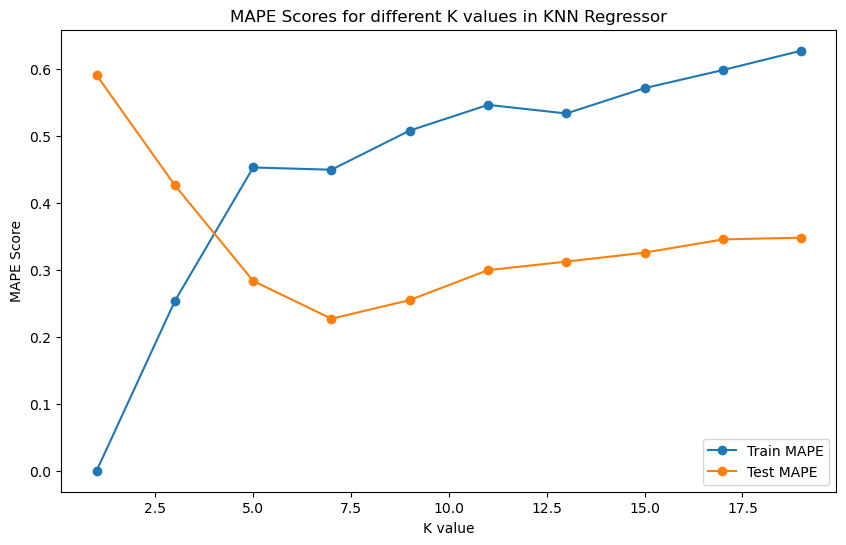

In [136]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

In [137]:
from sklearn.model_selection import cross_val_score

In [138]:
k_values = np.arange(1, 20, 2)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

In [139]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

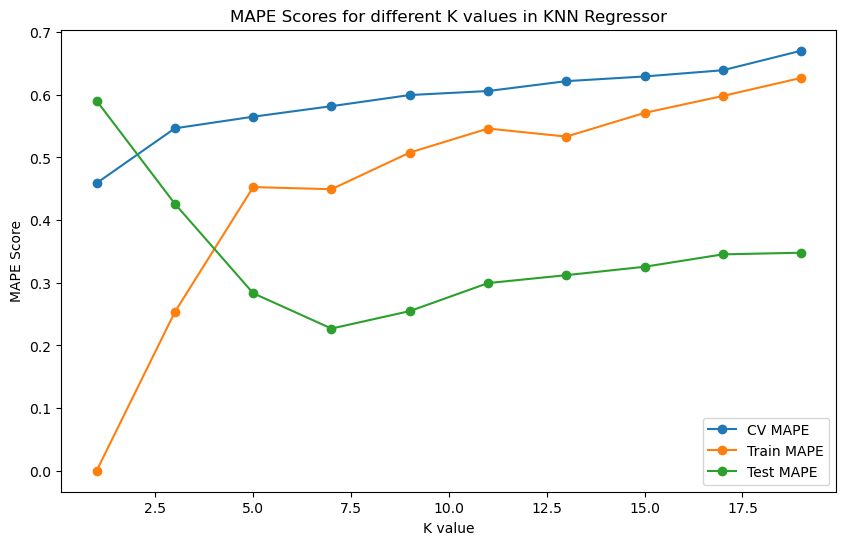

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

In [141]:
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

The best K value for CV is 1.


In [142]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [143]:
def k_fold_cross_validation(X, y, k_neighbors=3, k=5):
    scores=[]
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index],X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        scores.append(mse)
    return scores

In [144]:
X = pd.read_excel('Orders_features.xlsx')
y = pd.read_excel('Orders_labels.xlsx')

In [145]:
cv_scores = k_fold_cross_validation(X, y,k_neighbors=3,k=5)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [146]:
mean_accuracy = np.mean(cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Mean Accuracy: 0.67


### DATASET 4: Mall Customers

In [147]:
df = pd.read_excel('Mall_Customers.xlsx')

In [148]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,40
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [149]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [150]:
df.shape

(200, 5)

In [151]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [152]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [153]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.205000
std,57.879185,13.969007,26.264721,25.821439
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [154]:
df.groupby(['Gender','Age']) ['Annual Income (k$)'].mean()

Gender  Age
Female  18     65.00
        19     64.00
        20     26.50
        21     44.75
        22     37.00
               ...  
Male    66     63.00
        67     45.00
        68     63.00
        69     44.00
        70     47.50
Name: Annual Income (k$), Length: 87, dtype: float64

In [155]:
df.pivot_table(index = 'Gender', columns = 'Spending Score (1-100)', values = 'Annual Income (k$)', aggfunc='value_counts')

Spending Score (1-100)     1   3   4   5    6   7    8   9   10  11  ...  89  \
Gender Annual Income (k$)                                            ...       
Female 16                 NaN NaN NaN NaN  1.0 NaN  NaN NaN NaN NaN  ... NaN   
       17                 NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN  ... NaN   
       18                 NaN NaN NaN NaN  1.0 NaN  NaN NaN NaN NaN  ... NaN   
       19                 NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN  ... NaN   
       20                 NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN  ... NaN   
...                        ..  ..  ..  ..  ...  ..  ...  ..  ..  ..  ...  ..   
Male   99                 NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN  ... NaN   
       101                NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN  ... NaN   
       113                NaN NaN NaN NaN  NaN NaN  1.0 NaN NaN NaN  ... NaN   
       126                NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN  ... NaN   
       137                NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN  ... NaN   

Spending Score (1-100)     90  91  92  93   94  95   97  98   99  
Gender Annual Income (k$)                                         
Female 16                 NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN  
       17                 NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN  
       18                 NaN NaN NaN NaN  1.0 NaN  NaN NaN  NaN  
       19                 NaN NaN NaN NaN  NaN NaN  NaN NaN  1.0  
       20                 NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN  
...                        ..  ..  ..  ..  ...  ..  ...  ..  ...  
Male   99                 NaN NaN NaN NaN  NaN NaN  1.0 NaN  NaN  
       101                NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN  
       113                NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN  
       126                NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN  
       137                NaN NaN NaN NaN  NaN NaN  NaN NaN  NaN  

[103 rows x 84 columns]

In [156]:
pd.crosstab(index=df['Gender'], columns=df['Annual Income (k$)'], margins=True)

Annual Income (k$),15,16,17,18,19,20,21,23,24,25,...,97,98,99,101,103,113,120,126,137,All
Gender,,,,,,,,,,,,,,,,,,,,,
Female,0,2,2,2,2,2,1,1,0,1,...,2,1,1,1,4,1,2,1,0,112
Male,2,0,0,0,2,2,1,1,2,1,...,0,1,1,1,0,1,0,1,2,88
All,2,2,2,2,4,4,2,2,2,2,...,2,2,2,2,4,2,2,2,2,200


In [157]:
df = df.drop('CustomerID', axis = 1)

In [158]:
df=df.dropna()

In [159]:
df.shape

(200, 4)

In [160]:
df_num=df.select_dtypes(include = 'number')
df_num.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,40
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [161]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [162]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

<Axes: xlabel='Spending Score (1-100)'>

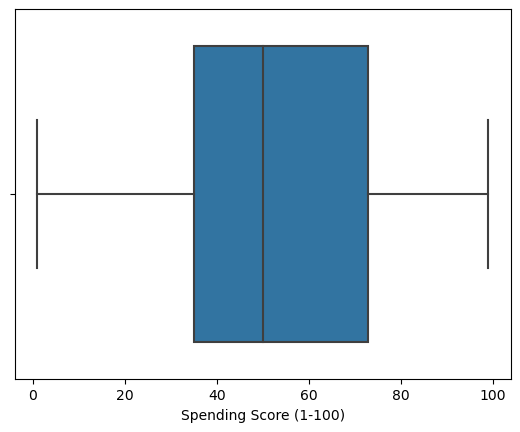

In [163]:
sns.boxplot(x=df['Spending Score (1-100)'])

In [164]:
X = df.drop('Spending Score (1-100)', axis=1)
y = df['Spending Score (1-100)']
X.head()

,Gender,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17


In [165]:
X_num = X.select_dtypes('number')
X_num.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [166]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [167]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [168]:
type(X_num_scaled)

numpy.ndarray

In [169]:
X_num_scaled = pd.DataFrame((X_num_scaled), columns=X_num.columns, index=X_num.index)
X_num_scaled

,Age,Annual Income (k$)
0,0.019231,0.000000
1,0.057692,0.000000
2,0.038462,0.009009
3,0.096154,0.009009
4,0.250000,0.018018
...,...,...
193,0.384615,0.882883
194,0.557692,0.945946
195,0.326923,0.945946
196,0.519231,1.000000


In [170]:
X_num_scaled.describe()

,Age,Annual Income (k$)
count,198.000000,198.000000
mean,0.402486,0.403494
std,0.269555,0.227363
min,0.000000,0.000000
25%,0.197115,0.229730
50%,0.346154,0.414414
75%,0.596154,0.565315
max,1.000000,1.000000


In [171]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [172]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [173]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((198, 4), (198, 2), (198, 2))

In [174]:
X.describe()

,Age,Annual Income (k$),Gender_Female,Gender_Male
count,198.000000,198.000000,198.000000,198.000000
mean,0.402486,0.403494,0.565657,0.434343
std,0.269555,0.227363,0.496927,0.496927
min,0.000000,0.000000,0.000000,0.000000
25%,0.197115,0.229730,0.000000,0.000000
50%,0.346154,0.414414,1.000000,0.000000
75%,0.596154,0.565315,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(158, 4)
(40, 4)
(158,)
(40,)


In [177]:
X.to_excel('Mall_features.xlsx', index=False)
y.to_excel('Mall_labels.xlsx',index=False)

In [178]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

In [179]:
k_values = np.arange(1,150,5)
train_mape_scores = []
test_mape_scores = []

In [180]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

In [181]:
test_mape_scores

[5.152921806152253,
 4.050400091489132,
 4.15838893627683,
 3.9479153398906135,
 3.799494377678002,
 3.5998146102146764,
 3.425312236796463,
 3.2951410358606794,
 3.2888474840496684,
 3.267011260745041,
 3.265024227507709,
 3.2726968757964885,
 3.3283069682228317,
 3.3379531748422027,
 3.275255476447454,
 3.3195927119890514,
 3.3168486960764,
 3.3347042949761914,
 3.293859122650491,
 3.313062688194479,
 3.2673147522425454,
 3.2522679815514217,
 3.2742430910782745,
 3.2756067180164115,
 3.2583440226665346,
 3.2713959857172497,
 3.2570263894996963,
 3.253038114827658,
 3.249397788447118,
 3.26137313867248]

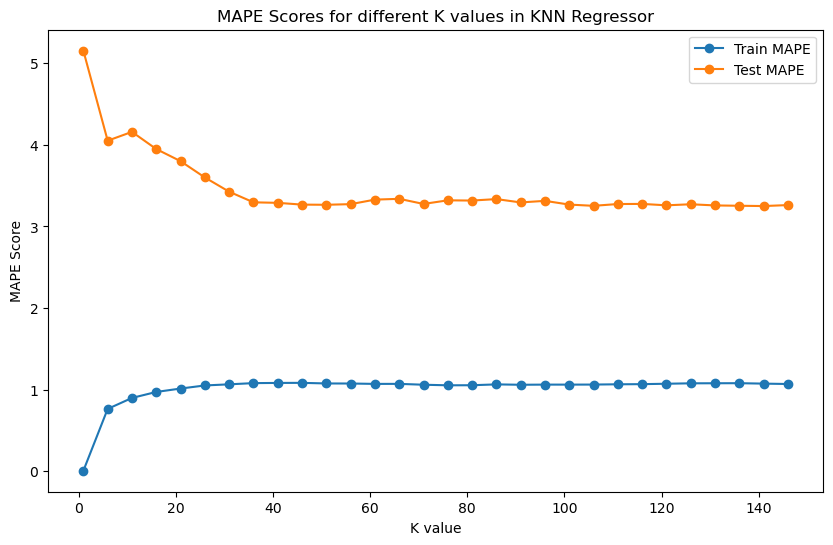

In [182]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

In [183]:
from sklearn.model_selection import cross_val_score

In [184]:
k_values = np.arange(1, 150, 5)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

In [185]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

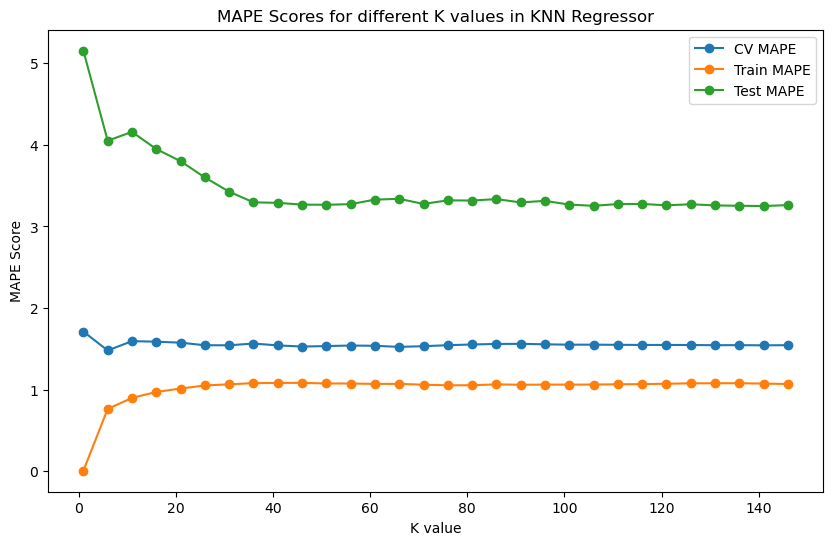

In [186]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

In [187]:
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

The best K value for CV is 6.


In [188]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [189]:
def k_fold_cross_validation(X, y, k_neighbors=3, k=5):
    scores=[]
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index],X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        scores.append(mse)
    return scores

In [192]:
X = pd.read_excel('Mall_features.xlsx')
y = pd.read_excel('Mall_labels.xlsx')

In [193]:
cv_scores = k_fold_cross_validation(X, y,k_neighbors=3,k=5)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyError: "None of [Int64Index([  0,   2,   3,   4,   5,   6,   7,   9,  10,  11,\n            ...\n            184, 185, 186, 187, 188, 190, 192, 193, 194, 197],\n           dtype='int64', length=158)] are in the [columns]"

In [194]:
mean_accuracy = np.mean(cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Mean Accuracy: 1.54


### DATASET 5: Admission

In [195]:
df=pd.read_excel('Admission_Predict.xlsx')

In [196]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [197]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0
399,400,333,117,4,5.0,4.0,9.66,1,1


In [198]:
df.shape

(400, 9)

In [199]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


In [200]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [201]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.450000
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.498117
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.000000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


In [202]:
df.groupby(['GRE Score', 'TOEFL Score'])['Chance of Admit'].value_counts()

GRE Score  TOEFL Score  Chance of Admit
290        100          0                  1
           104          0                  1
293        97           0                  1
294        93           0                  1
           95           0                  1
                                          ..
340        112          1                  1
           113          1                  1
           114          1                  1
           115          1                  1
           120          1                  4
Name: Chance of Admit, Length: 305, dtype: int64

In [203]:
df.pivot_table(index = 'Serial No.', columns = 'Chance of Admit', values = 'GRE Score', aggfunc = 'mean'  )

Chance of Admit,0,1
Serial No.,,
1,NaN,337.0
2,NaN,324.0
3,316.0,NaN
4,NaN,322.0
5,314.0,NaN
...,...,...
396,NaN,324.0
397,NaN,325.0
398,NaN,330.0


In [204]:
pd.crosstab(index = df['GRE Score'], columns = df['Chance of Admit'], margins = True)

Chance of Admit,0,1,All
GRE Score,,,
290,2,0,2
293,1,0,1
294,2,0,2
295,4,0,4
296,5,0,5
297,4,0,4
298,7,0,7
299,8,0,8
300,9,0,9


In [205]:
df = df.drop(columns=['Serial No.', 'Research'])

In [206]:
df = df.dropna()

In [207]:
df.shape

(400, 7)

In [208]:
df_num = df.select_dtypes(include='number') #from df select data type which includes number
df_num.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,0
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [209]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [210]:
lower_bound

GRE Score            282.50000
TOEFL Score           89.50000
University Rating     -1.00000
SOP                    0.25000
LOR                    1.50000
CGPA                   6.83125
Chance of Admit       -1.50000
dtype: float64

In [211]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [212]:
df.shape

(398, 7)

<Axes: xlabel='Chance of Admit'>

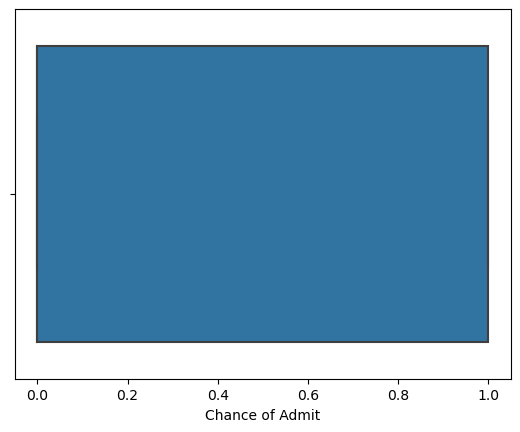

In [213]:
sns.boxplot(x=df['Chance of Admit'])

In [214]:
df_num = df.select_dtypes('number')
df_num.shape

(398, 7)

In [215]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [216]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [217]:
X_num = X.select_dtypes('number')
X_num.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [218]:
X_cat = X.select_dtypes('object')
X_cat.head()

""
0
1
2
3
4


In [219]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [220]:
type(X_num_scaled)

numpy.ndarray

In [221]:
X_num_scaled = pd.DataFrame((X_num_scaled), columns=X_num.columns, index=X_num.index)
X_num_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,0.94,0.928571,0.75,0.875,0.857143,0.900735
1,0.68,0.535714,0.75,0.750,0.857143,0.613971
2,0.52,0.428571,0.50,0.500,0.571429,0.294118
3,0.64,0.642857,0.50,0.625,0.285714,0.540441
4,0.48,0.392857,0.25,0.250,0.428571,0.371324
...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.571429,0.676471
396,0.70,0.535714,0.50,0.500,0.571429,0.702206
397,0.80,0.857143,0.75,1.000,0.857143,0.827206
398,0.44,0.392857,0.50,0.625,0.714286,0.580882


In [222]:
X_num_scaled.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.537889,0.552315,0.524497,0.601759,0.560660,0.517135
std,0.228727,0.215445,0.284236,0.250491,0.254072,0.216001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380000,0.392857,0.250000,0.375000,0.428571,0.360294
50%,0.540000,0.535714,0.500000,0.625000,0.571429,0.522059
75%,0.700000,0.714286,0.750000,0.750000,0.714286,0.686581
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [223]:
X.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,316.894472,107.464824,3.097990,3.407035,3.462312,8.606608
std,11.436339,6.032450,1.136944,1.001963,0.889251,0.587522
min,290.000000,92.000000,1.000000,1.000000,1.500000,7.200000
25%,309.000000,103.000000,2.000000,2.500000,3.000000,8.180000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.620000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.067500
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X_num_scaled, y, test_size=0.2, random_state=42)

In [225]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(318, 6)
(80, 6)
(318,)
(80,)


In [226]:
X.to_excel('Admission_features.xlsx', index=False)
y.to_excel('Admission_labels.xlsx',index=False)

In [227]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

In [228]:
k_values = np.arange(1,100,5)
train_mape_scores = []
test_mape_scores = []

In [229]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

In [230]:
test_mape_scores

[731834939447705.6,
 581714951868689.1,
 537361319174888.8,
 545357767376896.0,
 533462098718291.0,
 502324573822093.8,
 504838990487499.2,
 511346207691025.1,
 512147152746705.8,
 516445392051725.4,
 521004662774233.9,
 525755045784546.8,
 520497989720688.5,
 532243592325604.2,
 539163335671115.8,
 548135480962856.4,
 559474953708834.8,
 559022395606744.7,
 566043085033517.1,
 575850889853883.8]

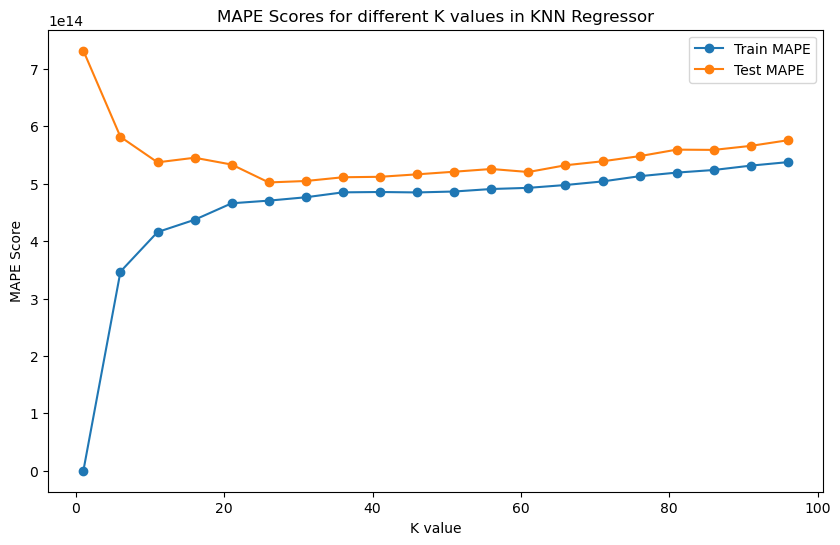

In [231]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

In [232]:
from sklearn.model_selection import cross_val_score

In [233]:
k_values = np.arange(1, 100, 5)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

In [234]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X_num_scaled, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

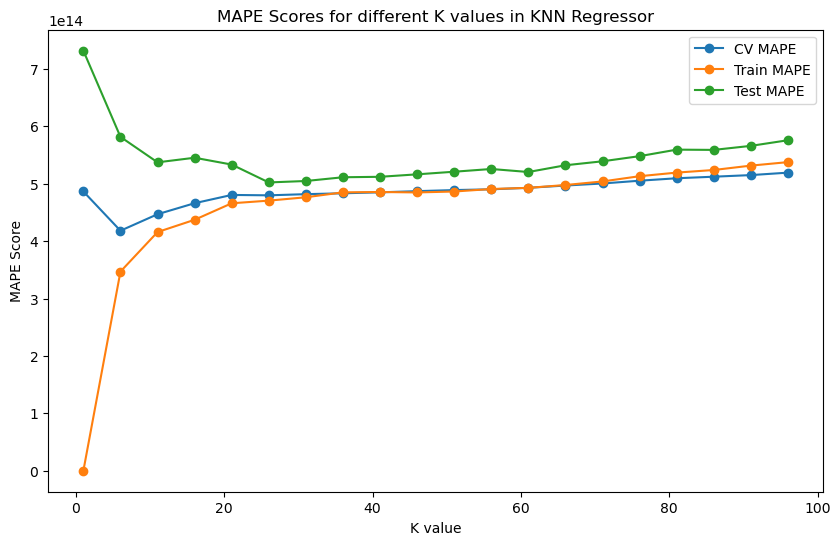

In [235]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

In [236]:
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

The best K value for CV is 6.


In [237]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [238]:
def k_fold_cross_validation(X, y, k_neighbors=3, k=5):
    scores=[]
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index],X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        scores.append(mse)
    return scores

In [241]:
X = pd.read_excel('Admission_features.xlsx')
y = pd.read_excel('Admission_labels.xlsx')

In [242]:
cv_scores = k_fold_cross_validation(X, y,k_neighbors=3,k=5)

KeyError: "None of [Int64Index([  1,   2,   3,   5,   6,   8,   9,  10,  13,  14,\n            ...\n            386, 387, 388, 389, 390, 392, 393, 395, 396, 397],\n           dtype='int64', length=318)] are in the [columns]"

In [243]:
mean_accuracy = np.mean(cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Mean Accuracy: 519386653228287.31


### DATASET 6: BMI

In [244]:
df = pd.read_excel('bmi.xlsx')

In [245]:
df.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


In [246]:
df.tail()

,Age,Height,Weight,Bmi,BmiClass
736,34,1.86,95.7,27.662157,Overweight
737,44,1.91,106.9,29.302925,Overweight
738,25,1.82,88.4,26.687598,Overweight
739,35,1.88,98.5,27.868945,Overweight
740,45,1.93,109.9,29.504148,Overweight


In [247]:
df.shape

(741, 5)

In [248]:
print(df.columns)

Index(['Age', 'Height', 'Weight', 'Bmi', 'BmiClass'], dtype='object')


In [249]:
df.dtypes

Age           int64
Height      float64
Weight      float64
Bmi         float64
BmiClass     object
dtype: object

In [250]:
df.describe

<bound method NDFrame.describe of      Age  Height  Weight        Bmi       BmiClass
0     61    1.85  109.30  31.935720  Obese Class 1
1     60    1.71   79.02  27.023700     Overweight
2     60    1.55   74.70  31.092612  Obese Class 1
3     60    1.46   35.90  16.841809    Underweight
4     60    1.58   97.10  38.896010  Obese Class 2
..   ...     ...     ...        ...            ...
736   34    1.86   95.70  27.662157     Overweight
737   44    1.91  106.90  29.302925     Overweight
738   25    1.82   88.40  26.687598     Overweight
739   35    1.88   98.50  27.868945     Overweight
740   45    1.93  109.90  29.504148     Overweight

[741 rows x 5 columns]>

In [251]:
df.BmiClass.value_counts()

Normal Weight    342
Overweight       166
Underweight       96
Obese Class 3     62
Obese Class 2     55
Obese Class 1     20
Name: BmiClass, dtype: int64

In [252]:
df.groupby(['BmiClass', 'Age'])['Bmi'].sum()

BmiClass       Age
Normal Weight  15     142.965159
               16     210.501340
               17     217.177131
               18     401.586853
               19     383.517678
                         ...    
Underweight    56      16.706002
               57      16.659725
               58      16.659725
               59      16.888722
               60      16.841809
Name: Bmi, Length: 217, dtype: float64

In [253]:
df.pivot_table(index = 'Age', columns = ['BmiClass'], values = 'Bmi', aggfunc = 'sum')

BmiClass,Normal Weight,Obese Class 1,Obese Class 2,Obese Class 3,Overweight,Underweight
Age,,,,,,
15,142.965159,32.388355,72.110759,41.522491,NaN,16.649324
16,210.501340,NaN,107.540345,43.942672,NaN,117.377145
17,217.177131,34.894399,74.729879,45.714286,NaN,119.919046
18,401.586853,34.602076,74.728794,47.342507,52.644715,134.824407
19,383.517678,69.034746,39.183673,49.382716,51.309024,135.705552
20,371.315450,NaN,113.511740,51.322304,51.383435,134.999409
21,412.926700,NaN,73.536780,96.029266,51.530403,49.091702
22,459.204270,NaN,109.597523,143.334289,51.562632,NaN
23,344.491009,NaN,NaN,145.796648,52.553848,18.459467


In [254]:
df=df.drop(columns=['BmiClass'])

In [255]:
df.shape

(741, 4)

In [256]:
df=df.dropna()

In [257]:
df.shape

(741, 4)

In [258]:
df_num=df.select_dtypes(include='number')
df_num.head()

,Age,Height,Weight,Bmi
0,61,1.85,109.30,31.935720
1,60,1.71,79.02,27.023700
2,60,1.55,74.70,31.092612
3,60,1.46,35.90,16.841809
4,60,1.58,97.10,38.896010


In [259]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [260]:
lower_bound

Age       -5.00000
Height     1.54850
Weight    32.55000
Bmi       14.45039
dtype: float64

In [261]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [262]:
df.shape

(579, 4)

<Axes: xlabel='Bmi'>

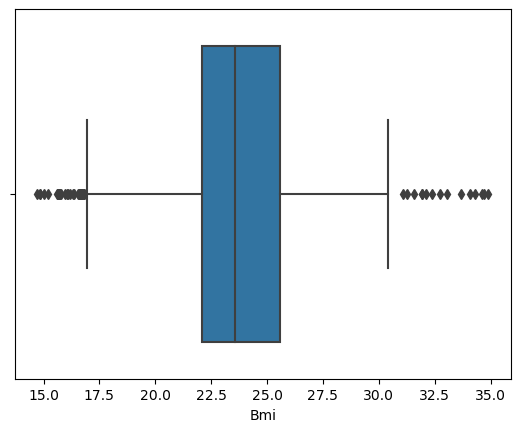

In [263]:
sns.boxplot(x=df['Bmi'])

In [264]:
df_num=df.select_dtypes(include='number')
df_num.head()

,Age,Height,Weight,Bmi
0,61,1.85,109.30,31.935720
1,60,1.71,79.02,27.023700
2,60,1.55,74.70,31.092612
5,59,1.71,79.32,27.126295
6,59,1.70,73.32,25.370242


In [265]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [266]:
lower_bound

Age       -3.500000
Height     1.575000
Weight    42.300000
Bmi       16.880101
dtype: float64

In [267]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [268]:
df.shape

(513, 4)

<Axes: xlabel='Bmi'>

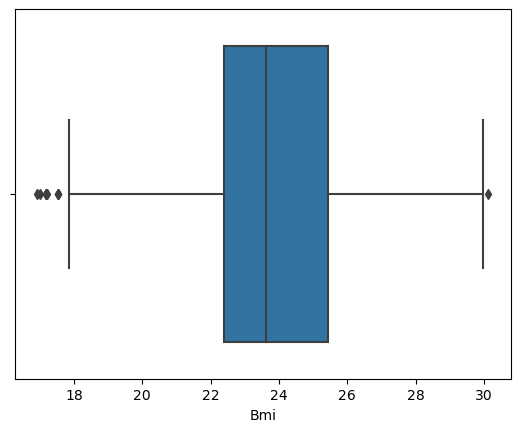

In [269]:
sns.boxplot(x=df['Bmi'])

In [270]:
df_num=df.select_dtypes(include='number')
df_num.head()

,Age,Height,Weight,Bmi
1,60,1.71,79.02,27.023700
5,59,1.71,79.32,27.126295
6,59,1.70,73.32,25.370242
7,59,1.72,85.32,28.839913
10,58,1.71,79.31,27.122875


In [271]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [272]:
lower_bound

Age       -2.000000
Height     1.600000
Weight    45.715000
Bmi       17.800196
dtype: float64

In [273]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [274]:
df.shape

(495, 4)

<Axes: xlabel='Bmi'>

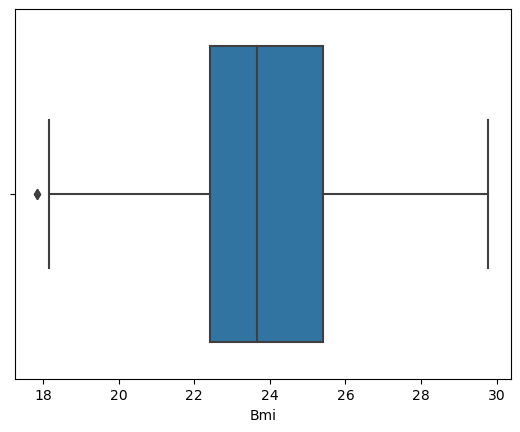

In [275]:
sns.boxplot(x = df['Bmi'])

In [276]:
X = df.drop('Bmi', axis=1)
y = df['Bmi']
X.head()

,Age,Height,Weight
1,60,1.71,79.02
5,59,1.71,79.32
6,59,1.70,73.32
7,59,1.72,85.32
10,58,1.71,79.31


In [277]:
X_num = X.select_dtypes('number')
X_num.head()

,Age,Height,Weight
1,60,1.71,79.02
5,59,1.71,79.32
6,59,1.70,73.32
7,59,1.72,85.32
10,58,1.71,79.31


In [278]:
X_cat = X.select_dtypes('object')
X_cat.head()

""
1
5
6
7
10


In [279]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [280]:
X_num_scaled = pd.DataFrame((X_num_scaled), columns=X_num.columns, index=X_num.index)
X_num_scaled

,Age,Height,Weight
1,1.000000,0.458333,0.677293
5,0.977778,0.458333,0.683843
6,0.977778,0.416667,0.552838
7,0.977778,0.500000,0.814847
10,0.955556,0.458333,0.683624
...,...,...,...
730,0.377778,0.916667,0.930131
732,0.177778,0.750000,0.770742
733,0.400000,1.000000,0.984716
735,0.200000,0.833333,0.825328


In [281]:
X_num_scaled.describe()

,Age,Height,Weight
count,495.000000,495.000000,495.000000
mean,0.358653,0.514256,0.495551
std,0.238373,0.189347,0.188685
min,0.000000,0.000000,0.000000
25%,0.155556,0.416667,0.370087
50%,0.311111,0.541667,0.519651
75%,0.511111,0.625000,0.614083
max,1.000000,1.000000,1.000000


In [282]:
 X.shape, X_num_scaled.shape

((495, 3), (495, 3))

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

In [284]:
X.to_excel('BMI_features.xlsx', index=False)
y.to_excel('BMI_labels.xlsx',index=False)

In [285]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

In [286]:
k_values = np.arange(1,100,5)
train_mape_scores = []
test_mape_scores = []

In [287]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

In [288]:
test_mape_scores

[0.02906890724066949,
 0.024417430484231478,
 0.027469678286200554,
 0.029092002285633987,
 0.03165258393697845,
 0.03320943402547107,
 0.034547872753014,
 0.03605745227649119,
 0.037337959729096815,
 0.0389955603256422,
 0.040190403101969745,
 0.04139143821087456,
 0.04237033287789401,
 0.043535142083887535,
 0.04444857438676591,
 0.04565699065642532,
 0.046467147424854166,
 0.04747494484551336,
 0.048393658175742656,
 0.04934692399953842]

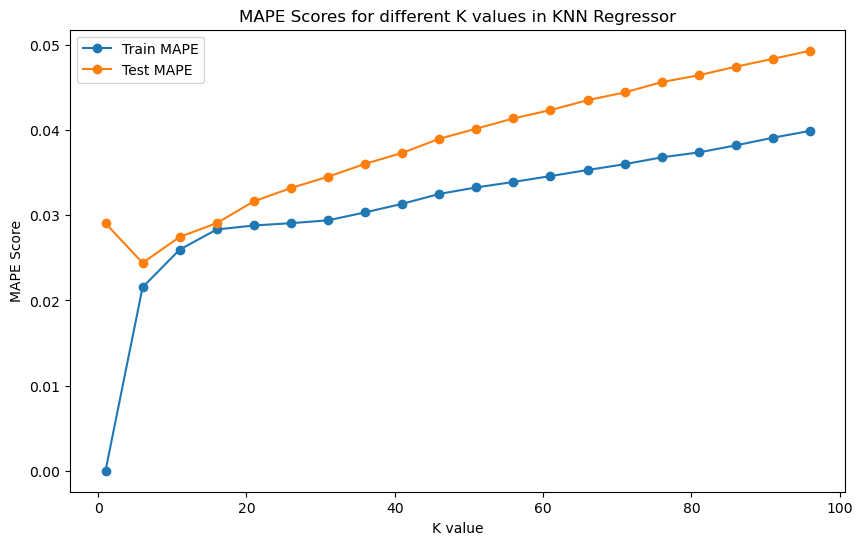

In [289]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

In [290]:
from sklearn.model_selection import cross_val_score

In [291]:
k_values = np.arange(1, 100, 5)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

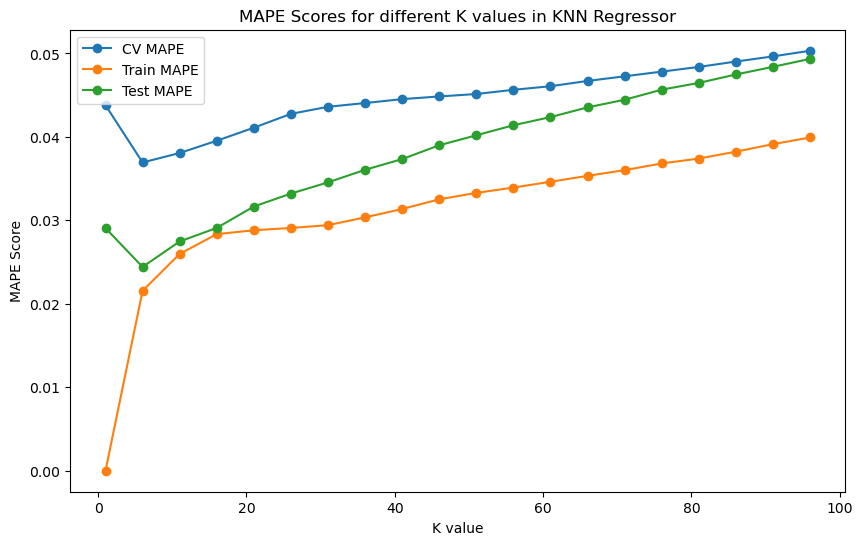

The best K value for CV is 6.


In [292]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

In [293]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [294]:
def k_fold_cross_validation(X, y, k_neighbors=3, k=5):
    scores=[]
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index],X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        scores.append(mse)
    return scores

In [295]:
X = pd.read_excel('BMI_features.xlsx')
y = pd.read_excel('Bmi_labels.xlsx')


In [296]:
cv_scores = k_fold_cross_validation(X, y,k_neighbors=3,k=5)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [ ]:
mean_accuracy = np.mean(cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

In [ ]:
X_train.shape, X_test.shape

In [ ]:
import numpy as np
from numpy.linalg import norm
#from numpy.argsort import argsort

In [ ]:
def knn_predn(X_train, y_train, x_test, k):
    dist = np.linalg.norm(X_train - x_test, axis=1)
    near = np.argsort(distances)[0:k]
    near_y= y_train[near]
    predn = np.mean(near_y)
    return predn

In [297]:
k = 3
y_predn = [knn_predn(X_train, y_train, x_test,k) for x_test in X_test]

NameError: name 'knn_predn' is not defined

In [298]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

NameError: name 'y_pred' is not defined

In [299]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

In [300]:
def k_fold_cross_validation(X, y, k_neighbors=3, k=5):
    scores=[]
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index],X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        scores.append(mse)
    return scores

In [301]:
X = pd.read_excel('BMI_features.xlsx')
y = pd.read_excel('BMI_labels.xlsx')


In [302]:
cv_scores = k_fold_cross_validation(X, y,k_neighbors=3,k=5)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [303]:
mean_accuracy = np.mean(cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Mean Accuracy: 0.05
